In [1]:
import os
os.environ["OPENCV_IO_ENABLE_OPENEXR"]="1"
import numpy as np
import cv2
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [2]:
PATH2EXR = "C:\Src\images\LuminanceChroma\Flowers.exr"
img = cv2.imread(PATH2EXR, cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)
'''
you might have to disable following flags, if you are reading a semantic map/label then because it will convert it into binary map so check both lines and see what you need
''' 
# img = cv2.imread(PATH2EXR) 
 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [3]:
img.max()

8.373413

In [4]:
img.min()

-0.06057994

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


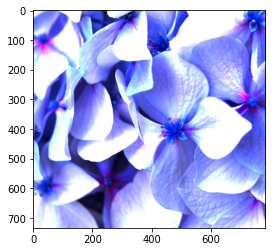

In [5]:
plt.imshow(img)

In [14]:
if(img.min() < 0):
    img = img + img.min()
img /= np.sqrt(np.sum(np.multiply(img,img), axis=(2,))).max()

In [16]:
bwimg = np.sqrt(np.sum(np.multiply(img,img), axis=(2,)))
bwimg.max()

0.99999994

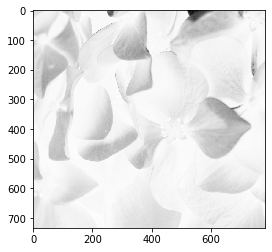

In [17]:
plt.imshow(bwimg,interpolation='none', cmap="Greys")

In [18]:
# convert to 8 bit image
temp = bwimg * 255
bwimgint = temp.astype(np.uint8)
temp.max()
#plt.imshow(bwimgint,interpolation='none', cmap="Greys")


254.99998

In [19]:
sortedimg = []
w = bwimgint.shape[0]
h = bwimgint.shape[1]
totalPixVal = np.sum(bwimgint)
avePixVal = totalPixVal/(w*h)
for i in range(w):
    for j in range(h):
        sortedimg.append([i,j,bwimgint[i][j]])
sortedimg.sort(key = lambda sortedimg: sortedimg[2])

In [20]:
sortedimg

[[127, 400, 1],
 [127, 401, 1],
 [625, 25, 1],
 [17, 328, 2],
 [20, 714, 2],
 [20, 717, 2],
 [21, 714, 2],
 [41, 155, 2],
 [127, 399, 2],
 [392, 502, 2],
 [393, 501, 2],
 [499, 129, 2],
 [504, 127, 2],
 [616, 733, 2],
 [622, 738, 2],
 [624, 24, 2],
 [18, 327, 3],
 [19, 326, 3],
 [20, 715, 3],
 [21, 297, 3],
 [21, 715, 3],
 [22, 325, 3],
 [76, 424, 3],
 [77, 424, 3],
 [80, 425, 3],
 [81, 425, 3],
 [102, 396, 3],
 [102, 397, 3],
 [103, 397, 3],
 [104, 397, 3],
 [104, 398, 3],
 [104, 399, 3],
 [105, 399, 3],
 [128, 403, 3],
 [145, 422, 3],
 [355, 137, 3],
 [367, 460, 3],
 [390, 500, 3],
 [391, 503, 3],
 [392, 501, 3],
 [411, 439, 3],
 [413, 435, 3],
 [498, 129, 3],
 [502, 128, 3],
 [578, 0, 3],
 [578, 1, 3],
 [579, 0, 3],
 [579, 1, 3],
 [583, 223, 3],
 [619, 732, 3],
 [622, 25, 3],
 [622, 739, 3],
 [623, 24, 3],
 [623, 739, 3],
 [624, 739, 3],
 [625, 24, 3],
 [625, 26, 3],
 [625, 27, 3],
 [625, 735, 3],
 [625, 739, 3],
 [646, 150, 3],
 [647, 151, 3],
 [648, 152, 3],
 [648, 153, 3],
 [652,

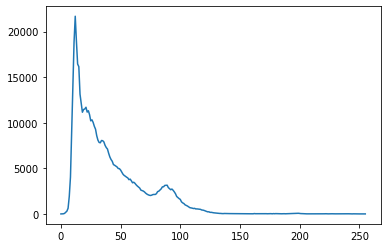

In [21]:
hist = np.zeros([256])
for pixel in sortedimg:
    hist[pixel[2]] += 1
plt.plot(hist)

In [22]:
eqAmount = int(np.ceil(h*w/256))
eqAmount

2248

In [31]:
sortedimg = np.array(sortedimg)
for i in range(0,256):
    sortedimg[i*eqAmount:(i+1)*eqAmount,2] = i
    #print(sortedimg[i*eqAmount:(i+1)*eqAmount,2])

In [32]:
sortedimg

array([[127, 400,   0],
       [127, 401,   0],
       [625,  25,   0],
       ...,
       [  7, 538, 255],
       [  3, 528, 255],
       [  3, 527, 255]])

2248.0

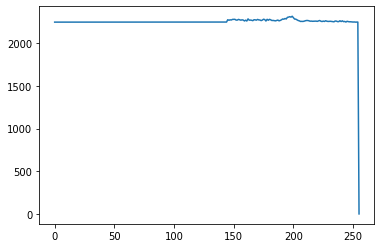

In [26]:
newimg = np.zeros([w,h])
for pix in sortedimg:
    newimg[pix[0],pix[1]] = pix[2]

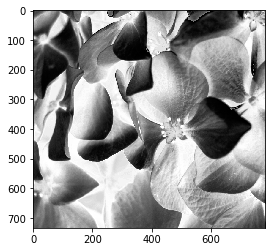

In [27]:
plt.imshow(newimg,interpolation='none', cmap="Greys")

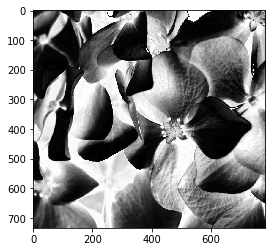

In [28]:
diff = np.abs(newimg-bwimgint)
#diff /= diff.max()
plt.imshow(diff,interpolation='none', cmap="Greys")

In [ ]:
diff

In [ ]:
diffhist = np.zeros([256])
for pixel in diff.reshape(w*h):
    diffhist[int(pixel)] += 1
plt.plot(newhist)

In [ ]:
newhist = np.zeros([256])
for pixel in sortedimg:
    hist[pixel[2]] += 1
plt.plot(newhist)